# Aprendizaje no supervisado y detección de anomalías

## Práctica: Técnicas de agrupación (clustering)

### Rafael Vázquez Conejo
#### Curso 2022-2023

In [1]:
#Librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc


# 1. Introducción

En este trabajo se presentan y elaboran diversos métodos de agrupamiento (clustering) sobre un conjunto de datos desde el punto de vista del aprendizaje no supervisado. Al ser un problema de aprendizaje no supervisado no se parte de un conocimiento previo, es decir, no se dispone de un conjunto de etiquetas o categorías que permitan agrupar los datos, si no que se trata de formar los grupos (cluster) en función de la similitud existente entre ellos. Esta posible similaridad entre datos se define en los métodos de clustering por medio de una función de distancia existentente dentro del espacio de características. Siguiendo esta idea, cuanto mayor sea la distancia entre dos elementos, mayor diferencia existirá entre ellos, y por tanto será interesante presentarlos en dos cluster diferentes. De igual forma, cuanto menor sea la distancia entre dos elementos del conjunto, mayor la probabilidad de que exista relación entre ellos, y por ello será interesante presentarlos en el mismo cluster.

Se debe establecer una medida de distancia o similitud entre los elementos del conjunto de datos para poder trabajar con este tipo de algoritmos. En este proyecto se utilizan diversas medidas con el fin de estudiar como puede afectar en la generación de los resultados.

Además de la medida de distancia o similitud, para el desarrollo de un algoritmo de clustering también será necesario definir la estrategia utilizada para la agrupación de los diferentes puntos. Durante el desarrollo de este trabajo se estudiarán las siguientes formas de agrupamiento:

- k-means
- DBSCAM
- ...

Posteriormente se acompaña cada algoritmo con una breve introdución teórica, además de los resultados de diversas ejecuciones.


Estos diversos algoritmos se aplicarán sobre dos datasets diferentes que comparten algunas de las carácteristicas, puesto que ambos tratan sobre una misma enfermedad. Este estudio sobre dos dataset distintos tiene como objetivo evaluar una posible similitud entre los clusters obtenidos en cada uno de ellos.

???? Quizas poner mas detalles aqui


# 2. Conjuntos de datos utilizados - ILPD y BUPA

### 2.1. ILDP (Indian Liver Patient Dataset)

ILDP (definicion) y comentar las variables ????


Introducido el dataset se procede a su lectura:

In [2]:
names_ildp = ["age", "gender", "tot_bilirubin", "direct_bilirubin", "tot_proteins", "albumin", "ag_ratio", "sgpt", "sgot", "alkphos", "is_patient"]
ildp = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names = names_ildp)
ildp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Respecto a la variable depentiente, 'is_patient', se observa que el 71% de los datos pertenecen a pacientes enfermos del hígado, mientras que el 28.5% es de pacientes sanos.

In [3]:
#Para evitar posteriores errores cambiamos las etiquetas de 'is_patient'
ildp.loc[ildp['is_patient'] == 1, 'is_patient'] = 0
ildp.loc[ildp['is_patient'] == 2, 'is_patient'] = 1
ildp.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [4]:
ildp['is_patient'].value_counts()

0    416
1    167
Name: is_patient, dtype: int64

#### Estudio exploratorio de los datos en ILDP

Se comienza estudiando la posible existencia de valores nulos: 

In [5]:
ildp.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

Se detectan 4 instancias con valores perdidos en la variable 'alkphos'. Un valor tan bajo no debe afectar en los resultados finales, por ello se decdide eliminar estas 4 filas, reduciendo el tamaño del dataset a 579 filas.

In [6]:
ildp = ildp.dropna(how='any',axis=0) 
ildp.reset_index(inplace=True, drop=True)
print(ildp.isnull().sum())

print(ildp.shape)

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64
(579, 11)


El siguiente paso trata la variable 'gender', puesto que el valor de este viene dado como un string será necesario trasnformarla a un valor numérico. Para ello reemplazamos 'Male' y 'Female' con 0 y 1 respectivamente:

In [7]:
ildp['gender'] = ildp['gender'].apply(lambda x:0 if x == 'Male' else 1)

ildp.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.241796,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Se observa en la media de la variable 'gender' una mayor presencia de hombres que de mujeres, lo cual es una ventaja, puesto que el siguiente dataset (BUPA) solamente contiene los resultados para individuos masculinos.

Respecto a las correlaciones entre las diferentes variables:

In [8]:
ildp.corr().style.background_gradient(cmap='coolwarm')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,-0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
gender,-0.055881,1.000000,-0.088068,-0.099160,0.029368,-0.081339,-0.079421,0.095149,0.095579,0.003424,0.081349
tot_bilirubin,0.011000,-0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
direct_bilirubin,0.006784,-0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
tot_proteins,0.078878,0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
albumin,-0.087799,-0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
ag_ratio,-0.020499,-0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
sgpt,-0.186248,0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
sgot,-0.264211,0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
alkphos,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


???????? comentar corre

In [9]:
male_patient = len(ildp[(ildp['gender']==0) & (ildp['is_patient']==0)])
female_patient = len(ildp[(ildp['gender']==1) & (ildp['is_patient']==0)])
ildp_by_gender = {'gender':[0,1], 'is_patient':[male_patient,female_patient]}

ildp_by_gender = pd.DataFrame(ildp_by_gender, index=['male', 'female'])
ildp_by_gender

,gender,is_patient
male,0,323
female,1,91


<AxesSubplot:title={'center':'Casos separados de hombres y mujeres con enfermedad'}, xlabel='gender', ylabel='is_patient'>

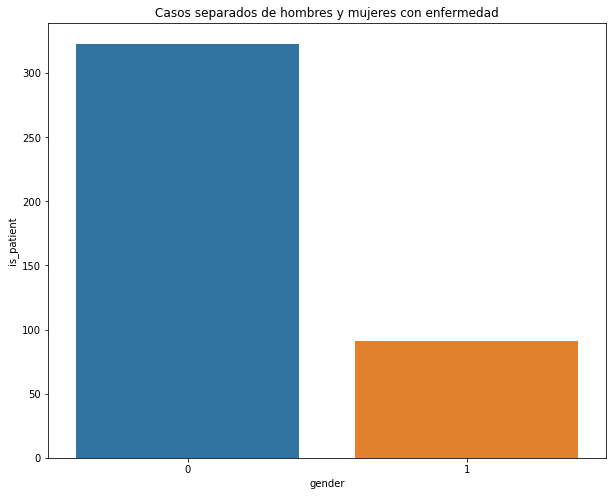

In [10]:
plt.figure(figsize= (10,8))
plt.title('Casos separados de hombres y mujeres con enfermedad')
sns.barplot(x = 'gender', y = 'is_patient', data = ildp_by_gender)

Se observa una clara diferencia que deja claro que los hombres tienen mayor probabilidad de sufrir de una enfermedad de hígado. 

Puesto que posteriormente se desea comparar con el dataset BUPA, el cual solamente está compuesto por casos masculinos, se opta por eliminar los resultados sobre pacientes femeninos.

In [11]:
ildp['gender'].value_counts()

0    439
1    140
Name: gender, dtype: int64

In [12]:
ildp = ildp[ildp['gender'] == 0]
ildp.reset_index(inplace=True, drop=True)
ildp.shape

(439, 11)

????? QUIZAS METER HIPOTESIS CON EDAD Y MOVIDAAS
https://www.kaggle.com/code/ubuntuzar/exploring-liver-disease-with-machine-learning

### 2.2. BUPA

El dataset Bupa contiene los resultados de diferentes tipos de análisis de sangre sensibles a los trastornos hepáticos que pueden surgir con un consumo excesivo de alcohol. Datos donados en 1990, correspondiendo cada fila del conjunto de datos al registro de un solo individuo masculino.

Un dato importante de este conjunto de datos, es que la séptima variable solía malinterpretarse como una variable que indica la presencia o ausencia de un trastorno hepático, pero esto es incorrecto, esta variable fue creada por investigadores para separar los datos en un conjunto de entrenamiento y otro de test. Por este motivo esta variable, ‘selector’, será eliminada en el proceso de exploración de los datos.

Respecto a las demás variables se presentan 5 variables independientes, las cuales corresponden a los resultados de diferentes análisis de sangre y una variable dependiente, todas variables numéricas. Se recogen un total de 345 muestras que representan el registro de cada individuo masculino. Se presentan a continuación las variables independientes:

- mcv: Variable numérica real que refleja el volumen corpuscular medio 

- alkphos: Variable numérica real que refleja la fosfatasa alcalina, una enzima responsable de eliminar grupos de fosfatos de varios tipos de moléculas como nucleótidos, proteínas y otros compuestos fosforilados. Los niveles de fosfatasa alcalina elevados podrían ser signo de daño en el hígado. 

- sgpt: Variable numérica real que refleja la alanina aminotransferasa, enzima que se encuentra principalmente en las células del hígado. Niveles altos de esta puede indicar que tiene algún tipo de daño en el hígado. 

- sgot: Variable numérica real que refleja la aspartato aminotransferasa, otra enzima del hígado. Los niveles elevados de esta en la sangre pueden indicar hepatitis, cirrosis, mononucleosis u otras enfermedades del h ́ıgado 

- gammagt: Variable numérica real que refleja la gamma-glutamil transpeptidasa, es una enzima hepática. Se mide su nivel en sangre siendo un marcador de laboratorio de enfermedad hepática (mala en altos niveles). 


La variable dependiente es drinks, un valor numérico real que refleja el número de medias pintas equivalentes a la cantidad de bebidas alcohólicas que se beben por día. 


In [13]:
names_bupa = ["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks", "selector"]
bupa =  pd.read_csv('bupa.data', sep=",", names = names_bupa)
print(bupa)

     mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0     85       92    45    27       31     0.0         1
1     85       64    59    32       23     0.0         2
2     86       54    33    16       54     0.0         2
3     91       78    34    24       36     0.0         2
4     87       70    12    28       10     0.0         2
..   ...      ...   ...   ...      ...     ...       ...
340   99       75    26    24       41    12.0         1
341   96       69    53    43      203    12.0         2
342   98       77    55    35       89    15.0         1
343   91       68    27    26       14    16.0         1
344   98       99    57    45       65    20.0         1

[345 rows x 7 columns]


#### Estudio exploratorio de los datos en BUPA

Tal y como se comenta en el punto anterior, se elimina la variable 'selector'

In [14]:
#Eliminar 'selector'
bupa = bupa.drop('selector', axis = 1)

El siguiente paso consiste en la búsqueda de valores nulos o instancias repetidas. Concluyendo en la nula presencia de valores perdidos, pero en la existencia de 4 filas repetidas, las cuales se precede a eliminar del conjunto, reduciéndose el número de muestras a 341:

In [15]:
#Valores nulos:
bupa.isnull().sum()

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drinks     0
dtype: int64

In [16]:
#Valores repetidos:
print(bupa.duplicated().sum())

#Elimino los duplicados
bupa = bupa.drop_duplicates(keep="first")
bupa.reset_index(inplace=True, drop=True)
print(bupa.duplicated().sum())

4
0


Se presenta un problema con la variable dependiente, pues existen 16 posibles clases diferentes. Para el proceso de clustering se poseen demasiadas clases para los pocos datos que forman el dataset, además si deseamos comparar con el otro dataset (ILPD) es necesario que tengamos dos clases.  Tras un proceso de documentación observo que para trabajar con esta variable esta se divide en dos posibles clases, según drinks < 5 o no. Esto se debe a que tomar menos de 5.5 pintas de medía al día tiene efectos muy bajos en la posibilidad de problemas en el hígado. Mientras que beber por encima de esta cantidad suele estar vinculado a problemas en el hígado. 

Por este motivo considero mejor opción tomar drinks > 5 como separación en dos posibles clases. De esta forma se ha reducido el número de clases de la variable drinks a 2, tomando un valor de 0 si drinks ≤ 5 y un valor de 1 si drinks > 5.


In [17]:
#Se reduce la variable dependiente drinks a dos clases
bupa.loc[bupa['drinks'] <= 5, 'drinks'] = 0
bupa.loc[bupa['drinks'] > 5, 'drinks'] = 1
print(bupa)


     mcv  alkphos  sgpt  sgot  gammagt  drinks
0     85       92    45    27       31     0.0
1     85       64    59    32       23     0.0
2     86       54    33    16       54     0.0
3     91       78    34    24       36     0.0
4     87       70    12    28       10     0.0
..   ...      ...   ...   ...      ...     ...
336   99       75    26    24       41     1.0
337   96       69    53    43      203     1.0
338   98       77    55    35       89     1.0
339   91       68    27    26       14     1.0
340   98       99    57    45       65     1.0

[341 rows x 6 columns]


El siguiente paso consiste en el análisis de las posibles relaciones existentes entre las variables, con el objetivo de determinar la posible existencia de relaciones entre variables, detalle a tener en cuenta en el posterior proceso de elaboración de modelos.

In [18]:
#Correlaciones entre las variables
bupa.corr().style.background_gradient(cmap='coolwarm')

,mcv,alkphos,sgpt,sgot,gammagt,drinks
mcv,1.000000,0.045281,0.151736,0.191460,0.223797,0.307676
alkphos,0.045281,1.000000,0.076940,0.145088,0.132908,0.095479
sgpt,0.151736,0.076940,1.000000,0.741316,0.502775,0.199093
sgot,0.191460,0.145088,0.741316,1.000000,0.528727,0.249443
gammagt,0.223797,0.132908,0.502775,0.528727,1.000000,0.289167
drinks,0.307676,0.095479,0.199093,0.249443,0.289167,1.000000


Quizas comentar outliers ???????

# 3. Medidas de calidad del clustering

Aqui explicar matrix de confusion siluete ...

# 4. Ajuste de Hiperparámetros

Previo a la aplicación de los diferentes algorimos de clustering, se debe introducir la metodología seguida para el ajuste de hiperparámetros.

### PCA sobre ILDP

In [19]:
#Normalizamos los datos con MinMaxScaler
#No me interesa la variable gender porque la hemos reducido a un solo valor
features = ["age", "tot_bilirubin", "direct_bilirubin", "tot_proteins", "albumin", "ag_ratio", "sgpt", "sgot", "alkphos"]
ildp_x = ildp.loc[:, features]
ildp_y = ildp.loc[:, ['is_patient']]

scaler = MinMaxScaler()
scaler.fit(ildp_x)
ildp_norm = scaler.transform(ildp_x)

total_ildp_norm = pd.DataFrame(ildp_norm, index=ildp.index, columns=features)
total_ildp_norm.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.480161,0.043228,0.079169,0.104339,0.039966,0.022855,0.539632,0.477320,0.258579
std,0.189273,0.088087,0.148888,0.109047,0.101936,0.065863,0.153996,0.169241,0.131725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.005102,0.051106,0.007538,0.003457,0.434783,0.369565,0.160000
50%,0.476744,0.010724,0.015306,0.068796,0.014070,0.007117,0.536232,0.456522,0.264000
75%,0.651163,0.033512,0.071429,0.109582,0.027638,0.016470,0.637681,0.608696,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
pca = PCA(n_components=2)
my_pca = pca.fit_transform(ildp_norm)

#Creo un dataset con las dos componentes principales obtenidas
ildp_pca = pd.DataFrame(data = my_pca, columns = ['PCA1', 'PCA2'])

print(ildp_pca)

         PCA1      PCA2
0    0.094951  0.031757
1    0.064223 -0.046030
2   -0.030756 -0.177627
3    0.252841 -0.159888
4   -0.323343 -0.121562
..        ...       ...
434  0.394804 -0.088808
435 -0.064095 -0.043047
436 -0.005583 -0.122000
437 -0.168181  0.043868
438 -0.377253 -0.081903

[439 rows x 2 columns]


In [21]:
pca.explained_variance_ratio_

array([0.36744377, 0.20065918])

In [22]:
#Uno las componentes principales con la variable dependiente
total_ildp_pca = pd.concat([ildp_pca, ildp_y], axis = 1)
print(total_ildp_pca)

         PCA1      PCA2  is_patient
0    0.094951  0.031757           0
1    0.064223 -0.046030           0
2   -0.030756 -0.177627           0
3    0.252841 -0.159888           0
4   -0.323343 -0.121562           0
..        ...       ...         ...
434  0.394804 -0.088808           1
435 -0.064095 -0.043047           0
436 -0.005583 -0.122000           0
437 -0.168181  0.043868           0
438 -0.377253 -0.081903           1

[439 rows x 3 columns]


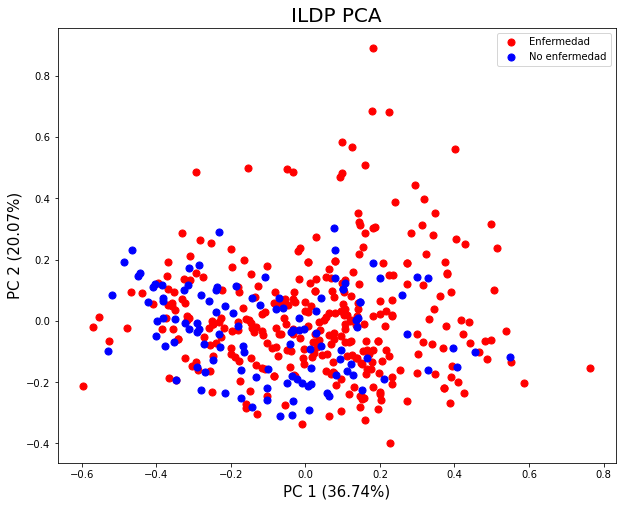

In [23]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 (36.74%)', fontsize = 15)
ax.set_ylabel('PC 2 (20.07%)', fontsize = 15)
ax.set_title('ILDP PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = total_ildp_pca['is_patient'] == target
    ax.scatter(total_ildp_pca.loc[indicesToKeep, 'PCA1'], 
               total_ildp_pca.loc[indicesToKeep, 'PCA2'], c = color, s = 50)
    
ax.legend(['Enfermedad', 'No enfermedad'])

### PCA sobre BUPA

In [24]:
#Normalizamos los datos con MinMaxScaler

features = ["mcv", "alkphos", "sgpt", "sgot", "gammagt"]
bupa_x = bupa.loc[:, features]
bupa_y = bupa.loc[:, ['drinks']]

scaler = MinMaxScaler()
scaler.fit(bupa_x)
bupa_norm = scaler.transform(bupa_x)

total_bupa_norm = pd.DataFrame(bupa_norm, index=bupa.index, columns=features)
total_bupa_norm.describe()

,mcv,alkphos,sgpt,sgot,gammagt
count,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.661059,0.407752,0.175584,0.255360,0.114390
std,0.117168,0.160278,0.129710,0.131371,0.135066
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.578947,0.295652,0.099338,0.181818,0.034247
50%,0.657895,0.382609,0.145695,0.233766,0.068493
75%,0.710526,0.495652,0.198675,0.285714,0.140411
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
pca = PCA(n_components=2)
my_pca = pca.fit_transform(bupa_norm)

#Creo un dataset con las dos componentes principales obtenidas
bupa_pca = pd.DataFrame(data = my_pca, columns = ['PCA1', 'PCA2'])

print(bupa_pca)

         PCA1      PCA2
0    0.085809  0.168815
1    0.087692 -0.090180
2   -0.087381 -0.119072
3    0.027962  0.063522
4   -0.107085  0.036870
..        ...       ...
336  0.040398  0.036566
337  0.535561 -0.153772
338  0.310251 -0.028730
339 -0.046623 -0.004308
340  0.403447  0.141415

[341 rows x 2 columns]


In [26]:
pca.explained_variance_ratio_

array([0.4401879 , 0.26617941])

In [27]:
#Uno las componentes principales con la variable dependiente
total_bupa_pca = pd.concat([bupa_pca, bupa_y], axis = 1)
print(total_bupa_pca)

         PCA1      PCA2  drinks
0    0.085809  0.168815     0.0
1    0.087692 -0.090180     0.0
2   -0.087381 -0.119072     0.0
3    0.027962  0.063522     0.0
4   -0.107085  0.036870     0.0
..        ...       ...     ...
336  0.040398  0.036566     1.0
337  0.535561 -0.153772     1.0
338  0.310251 -0.028730     1.0
339 -0.046623 -0.004308     1.0
340  0.403447  0.141415     1.0

[341 rows x 3 columns]


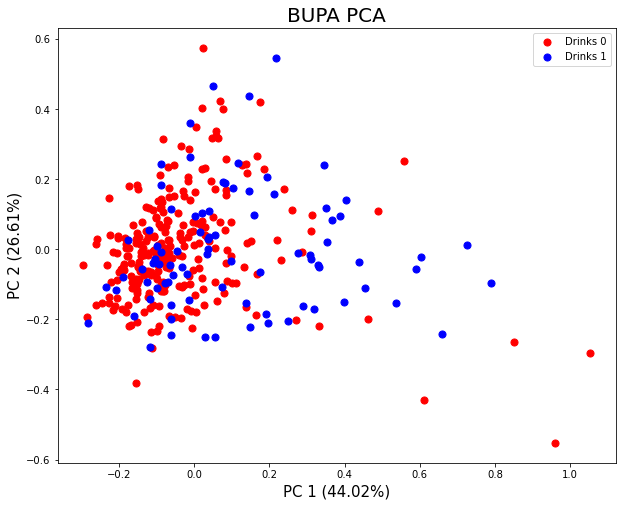

In [28]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 (44.02%)', fontsize = 15)
ax.set_ylabel('PC 2 (26.61%)', fontsize = 15)
ax.set_title('BUPA PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = total_bupa_pca['drinks'] == target
    ax.scatter(total_bupa_pca.loc[indicesToKeep, 'PCA1'], 
               total_bupa_pca.loc[indicesToKeep, 'PCA2'], c = color, s = 50)
    
ax.legend(['Drinks 0', 'Drinks 1'])

# 5. K-Medias

Se comienza con un algoritmo clásico de clustering, k-medias (k-means). Este algoritmo se basa en la partición del espacio de caracteristicas en k conjuntos (clusters) diferentes, tratando de minimizar la suma de las distancias entre cada punto y el clúster al que pertenecen.

El funcionamiento de este algoritmo se divide en dos estapas, una primera de asignación de los puntos a los diferentes cluster, y otra de actualización de los centros de cada cluster. El pseudocódigo del algoritmo es el siguiente:

    1. Generación aleatoria de los centros de los centroides
    2. Repetir mientras no haya cambios:
        - (Re)asignar cada punto al cluster con centro más cercano.
        - Recalcular el centro de cada cluster como su punto medio.
        
Se observa que una de las claras desventajas de este algoritmo, es la necesidad previa de indicar el valor k de cluster que se formarán.


### 3.1. Aplicar k-means sobre ILDP

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


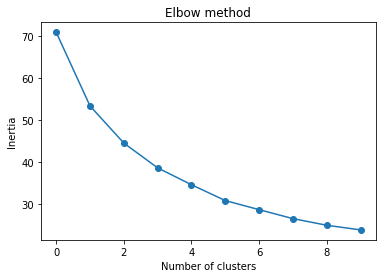

In [29]:
#Lo aplico sobre los datos normalizados no el pca
error = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(ildp_norm)
    
    error.append(kmeans.inertia_)

plt.plot(error, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

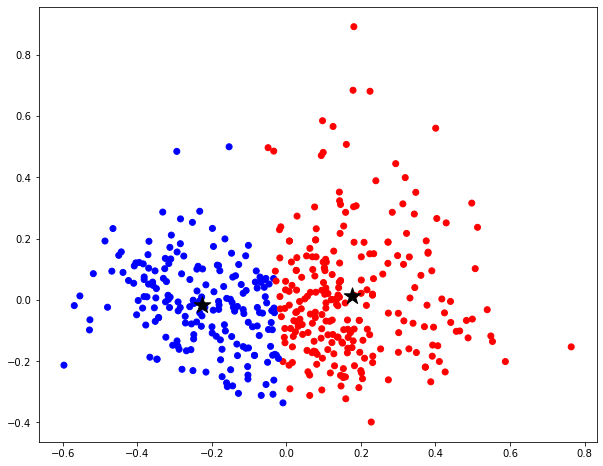

In [30]:
kmeans = KMeans(n_clusters=2, random_state=12345)
kmeans.fit(ildp_pca)

centros=kmeans.cluster_centers_
labels_ildp=kmeans.labels_

# Creamos los mapas de colores a utilizar
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10,8))
plt.scatter(ildp_pca.iloc[:, 0] , ildp_pca.iloc[:, 1], c=labels_ildp, cmap=cmap_bold)
plt.scatter(centros[:,0] , centros[:,1] , s = 300, c='black', marker='*')
plt.show()

<AxesSubplot:>

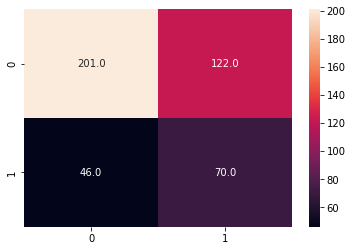

In [31]:
confusion_matrix = metrics.confusion_matrix(total_ildp_pca['is_patient'], labels_ildp)

sns.heatmap(confusion_matrix, annot=True, fmt=".1f")

In [32]:
accuracy = metrics.accuracy_score(total_ildp_pca['is_patient'], labels_ildp)
accuracy

0.6173120728929385

### 3.1. Aplicar k-means sobre BUPA

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


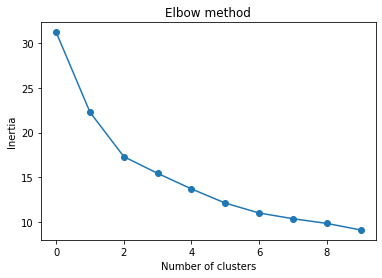

In [33]:
error = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(bupa_norm)
    
    error.append(kmeans.inertia_)

plt.plot(error, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

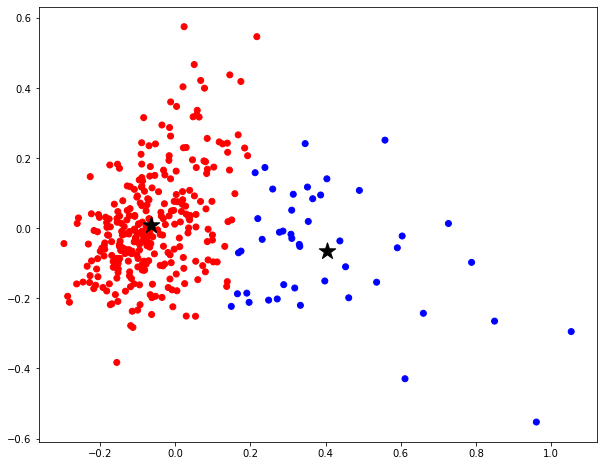

In [34]:
kmeans = KMeans(n_clusters=2, random_state=12345)
kmeans.fit(bupa_pca)

centros=kmeans.cluster_centers_
labels_bupa=kmeans.labels_

# Creamos los mapas de colores a utilizar
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10,8))
plt.scatter(bupa_pca.iloc[:, 0] , bupa_pca.iloc[:, 1], c=labels_bupa, cmap=cmap_bold)
plt.scatter(centros[:,0] , centros[:,1] , s = 300, c='black', marker='*')
plt.show()

<AxesSubplot:>

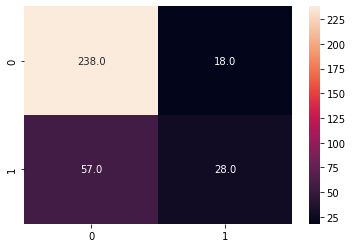

In [35]:
confusion_matrix = metrics.confusion_matrix(total_bupa_pca['drinks'], labels_bupa)

sns.heatmap(confusion_matrix, annot=True, fmt=".1f")

In [36]:
accuracy = metrics.accuracy_score(total_bupa_pca['drinks'], labels_bupa)
accuracy

0.7800586510263929

# 6. K-medioides

Mencionar que viene de la libreia from sklearn_extra.cluster import KMedoids

https://towardsdatascience.com/k-medoid-clustering-pam-algorithm-in-python-with-solved-example-c0dcb35b3f46

### 6.1. Aplicar k-medioides sobre ILDP

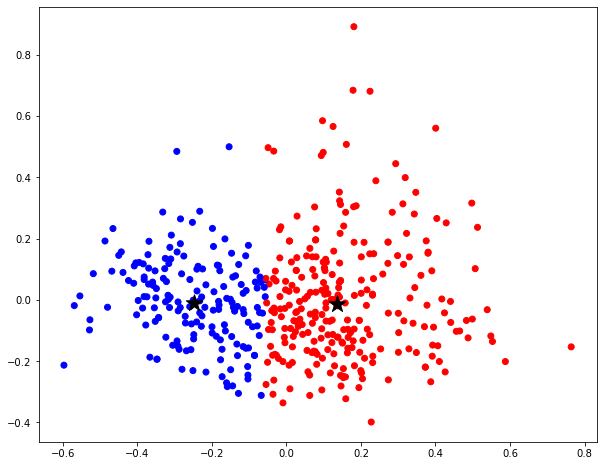

In [37]:
KMobj = KMedoids(n_clusters=2).fit(ildp_pca)

centros=KMobj.cluster_centers_
labels_ildp=KMobj.labels_

# Creamos los mapas de colores a utilizar
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10,8))
plt.scatter(ildp_pca.iloc[:, 0] , ildp_pca.iloc[:, 1], c=labels_ildp, cmap=cmap_bold)
plt.scatter(centros[:,0] , centros[:,1] , s = 300, c='black', marker='*')
plt.show()

### 6.2. Aplicar k-medioides sobre BUPA

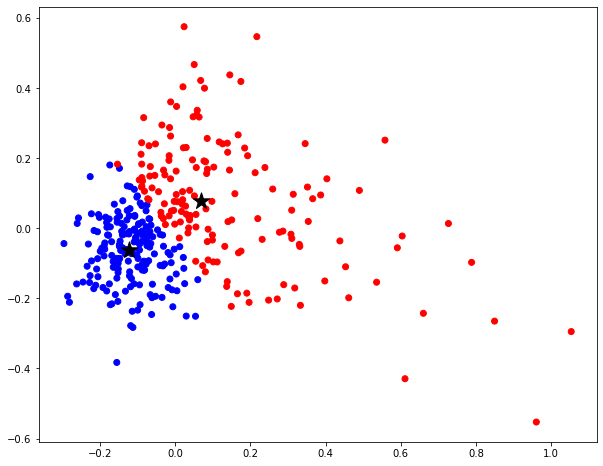

In [38]:
KMobj = KMedoids(n_clusters=2).fit(bupa_pca)

centros=KMobj.cluster_centers_
labels_bupa=KMobj.labels_

# Creamos los mapas de colores a utilizar
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10,8))
plt.scatter(bupa_pca.iloc[:, 0] , bupa_pca.iloc[:, 1], c=labels_bupa, cmap=cmap_bold)
plt.scatter(centros[:,0] , centros[:,1] , s = 300, c='black', marker='*')
plt.show()

# 7. DBSCAN

No tiene mucho sentido aplicar este método de clustering, ya que los puntos están demasiado próximos entre sí.

El parámetro 'eps' determina la distancia máxima entre dos muestras para que una se considere en la vecindad de la otra. Siendo este el parámetro DBSCAN más importante para elegir adecuadamente para su conjunto de datos y función de distancia.

Con un valor de eps de 0.1 siguen siendo pobres las agrupaciones obtenidas.


El parámetro min_samples: El número de muestras (o peso total) en una vecindad para que un punto se considere un punto central. Esto incluye el punto en sí.
Poca utilidad tiene aqui pues la concentración de puntos es exagerada.

In [39]:
dbscan = DBSCAN(eps=0.5).fit_predict(bupa_pca)


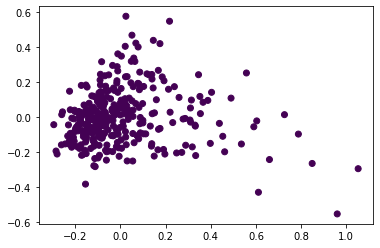

In [40]:
plt.scatter(bupa_pca.iloc[:, 0] , bupa_pca.iloc[:, 1], c=dbscan)

In [41]:
dbscan = DBSCAN(eps=0.5).fit_predict(ildp_pca)

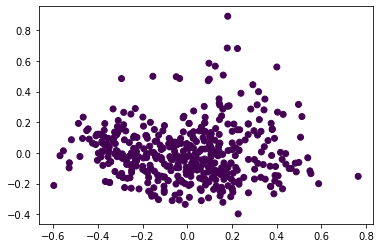

In [42]:
plt.scatter(ildp_pca.iloc[:, 0] , ildp_pca.iloc[:, 1], c=dbscan)

# 8. Clustering jerárquico

In [43]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(ildp_pca)

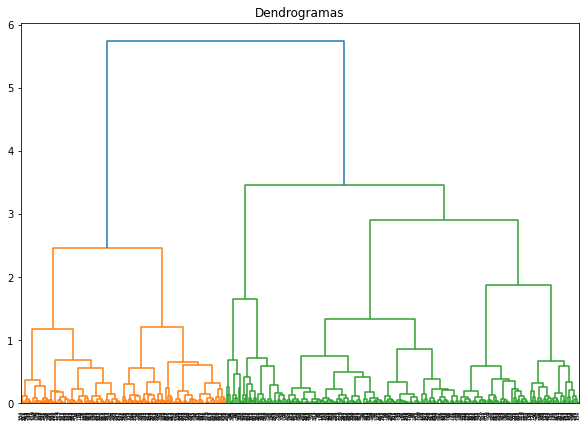

In [53]:
#https://aprendeia.com/algoritmo-agrupamiento-jerarquico-practica/

plt.figure(figsize=(10, 7))
plt.title("Dendrogramas")
dendrograma = shc.dendrogram(shc.linkage(ildp_pca, method = 'ward'))

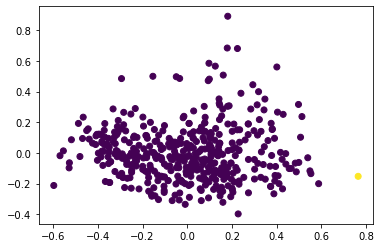

In [48]:
plt.scatter(ildp_pca.iloc[:, 0] , ildp_pca.iloc[:, 1], c=agglom.labels_)

In [49]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(bupa_pca)

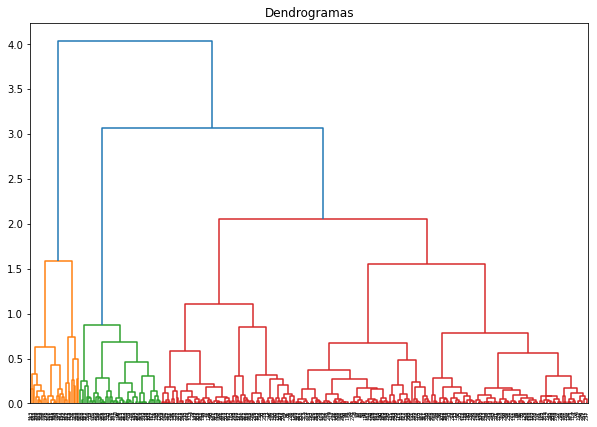

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogramas")
dendrograma = shc.dendrogram(shc.linkage(bupa_pca, method = 'ward'))

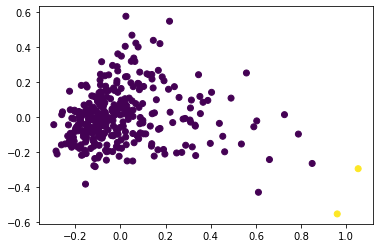

In [51]:
plt.scatter(bupa_pca.iloc[:, 0] , bupa_pca.iloc[:, 1], c=agglom.labels_)

https://aprendeia.com/algoritmo-agrupamiento-jerarquico-practica/
https://www.statdeveloper.com/agrupacion-en-cluster-jerarquica-en-python/

https://www.kaggle.com/code/rishabh222/indian-liver-patient-dataset
https://www.kaggle.com/code/ubuntuzar/exploring-liver-disease-with-machine-learning
https://www.kaggle.com/code/abdullahanwar7/liver-disease-ml-classification